In [2]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

In [4]:
dataset = 'twitter'
#dataset = 'MR'
checkpoint_dir = os.path.join(os.path.abspath(''), 'checkpoint', 'roberta-base_gcn_{}'.format(dataset))
data_dir = os.path.join(os.path.abspath(''), 'data')

In [5]:
with open(os.path.join(checkpoint_dir, 'df_epoch_info.pkl'), 'rb') as f:
    df_epoch_info = pkl.load(f, encoding = 'latin1')

In [6]:
df_epoch_info.head(10)

,epoch,train acc,train loss,val acc,val loss,test acc,test pre,test recall,test f1,test loss
0,1,0.848933,0.374346,0.847291,0.388308,0.834537,0.846876,0.816400,0.831358,0.402095
1,2,0.869002,0.326416,0.847291,0.381646,0.826658,0.822895,0.820890,0.821892,0.385593
2,3,0.809341,0.461245,0.760263,0.623739,0.773473,0.783450,0.787852,0.785645,0.634374
3,4,0.847108,0.359623,0.775041,0.594160,0.780039,0.785270,0.791439,0.788343,0.599952
4,5,0.926838,0.209877,0.825944,0.454817,0.830598,0.826332,0.826603,0.826467,0.429220
5,6,0.938332,0.170205,0.834154,0.486090,0.829941,0.827013,0.822893,0.824948,0.468213
6,7,0.950556,0.143086,0.814450,0.644292,0.818122,0.813450,0.814342,0.813895,0.606691
7,8,0.955118,0.136016,0.835796,0.601587,0.812869,0.807956,0.810424,0.809188,0.611914
8,9,0.950556,0.147322,0.798030,0.741690,0.789888,0.787841,0.794726,0.791269,0.750836
9,10,0.965700,0.083951,0.824302,0.673542,0.826001,0.821848,0.821160,0.821504,0.660733


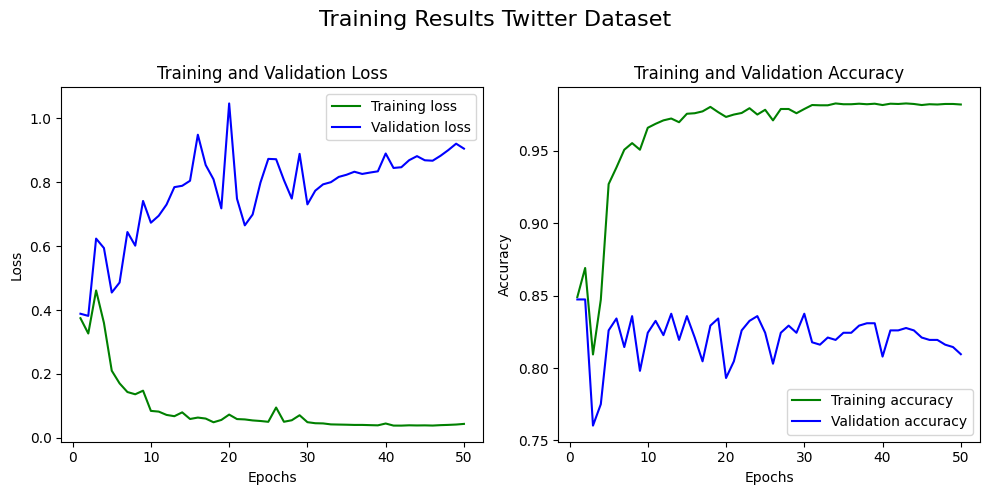

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].plot(df_epoch_info['epoch'], df_epoch_info['train loss'], 'g', label = 'Training loss')
ax[0].plot(df_epoch_info['epoch'], df_epoch_info['val loss'], 'b', label = 'Validation loss')
ax[0].set_title('Training and Validation Loss', fontsize = 12)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(df_epoch_info['epoch'], df_epoch_info['train acc'], 'g', label = 'Training accuracy')
ax[1].plot(df_epoch_info['epoch'], df_epoch_info['val acc'], 'b', label = 'Validation accuracy')
ax[1].set_title('Training and Validation Accuracy', fontsize = 12)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
fig.suptitle('Training Results Twitter Dataset'.format(dataset), fontsize = 16)
fig.tight_layout(rect = [0, 0, 1, 0.97])
fig.savefig(os.path.join(data_dir, 'Training Results Twitter Dataset.jpg'))
plt.show()

,Metric,MR,Shakespeare,Twitter
0,Accuracy,0.8790,0.7496,0.8345
1,Precision,0.8820,0.7574,0.8469
2,Recall,0.8790,0.6993,0.8164
3,F1,0.8805,0.7272,0.8314


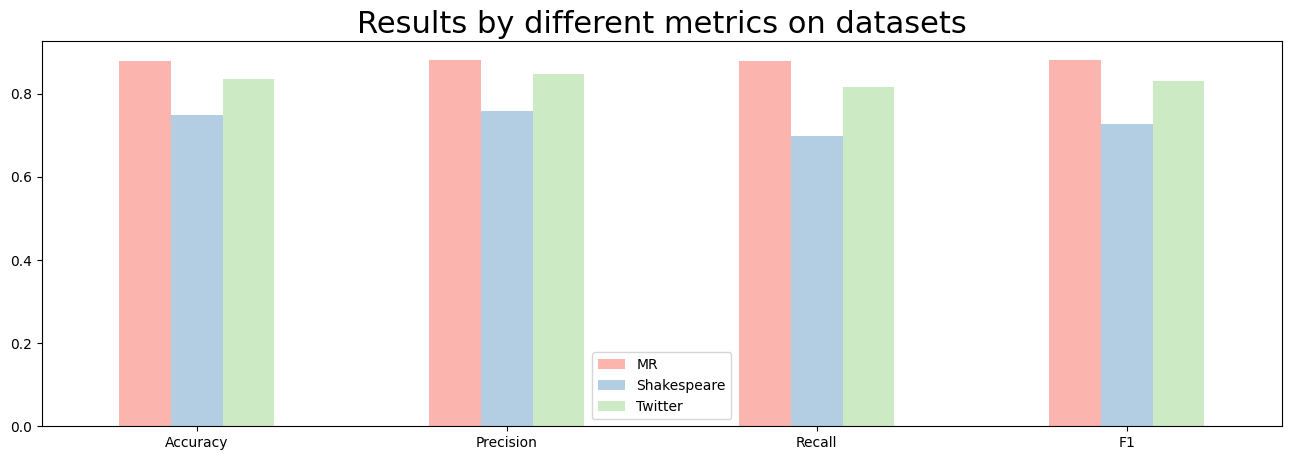

In [14]:
datasets = ['MR', 'Shakespeare', 'Twitter']
colors = plt.cm.Pastel1(np.arange(len(datasets)))

data = [
    ['Accuracy', 0.8790, 0.7496, 0.8345],
    ['Precision', 0.8820, 0.7574, 0.8469],
    ['Recall', 0.8790, 0.6993, 0.8164],
    ['F1', 0.8805, 0.7272, 0.8314]
]
df = pd.DataFrame(data, columns = ['Metric', 'MR', 'Shakespeare', 'Twitter'])
display(df.head())
df.plot(x = 'Metric', y = datasets, kind = 'bar' ,figsize = (16,5), rot = 0, color = colors)
plt.xlabel("")
plt.title("Results by different metrics on datasets", fontsize = 22)
plt.savefig(os.path.join(data_dir, 'Results by different metrics on datasets.jpg'))